Introducción

Este proyecto tiene como objetivo ayudar a optimizar los gastos de marketing para Y.Afisha, una empresa que ofrece servicios en línea. A través del análisis de datos de registros del servidor, pedidos y estadísticas de gastos de marketing, buscamos comprender cómo los clientes utilizan el servicio, cuándo comienzan a comprar, cuánto dinero aportan a la compañía y cuándo los ingresos cubren el costo de adquisición de los clientes.

Visitas:

¿Cuántas personas lo usan cada día, semana y mes?
¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
¿Cuál es la duración de cada sesión?
¿Con qué frecuencia los usuarios y las usuarias regresan?

Ventas:

¿Cuándo la gente empieza a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el/la usuario/a se convierte en cliente. Por ejemplo, si el registro y la primera compra ocurren el mismo día, el/la usuario/a podría caer en la categoría Conversion 0d. Si la primera compra ocurre al día siguiente, será Conversion 1d.  Puedes usar cualquier enfoque que te permita comparar las conversiones de diferentes cohortes para que puedas determinar qué cohorte o canal de marketing es más efectivo).
¿Cuántos pedidos hacen durante un período de tiempo dado?
¿Cuál es el tamaño promedio de compra?
¿Cuánto dinero traen? (LTV)

Marketing:

¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)
¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?
¿Cuán rentables eran las inversiones? (ROMI)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
visit = pd.read_csv('/content/visits_log_us.csv')
orders = pd.read_csv('/content/orders_log_us.csv')
mrk = pd.read_csv('/content/costs_us.csv')


<ipython-input-5-8b95059da823>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  visit = pd.read_csv('/content/visits_log_us.csv')


In [7]:
visit.info()
visit['End Ts']=pd.to_datetime(visit['End Ts'])
visit['Start Ts']=pd.to_datetime(visit['Start Ts'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240058 entries, 0 to 240057
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     240058 non-null  object        
 1   End Ts     240057 non-null  datetime64[ns]
 2   Source Id  240057 non-null  float64       
 3   Start Ts   240057 non-null  datetime64[ns]
 4   Uid        240058 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(2)
memory usage: 9.2+ MB


In [8]:
visit.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4.0,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2.0,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5.0,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9.0,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3.0,2017-12-27 14:06:00,9969694820036681168


In [9]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders ['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [11]:
mrk.info()
mrk.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [12]:
mrk['dt']= pd.to_datetime(mrk['dt'])
mrk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Metricas**

Visitas

In [16]:
# Número de usuarios únicos por día
unique_users_per_day = visit.groupby(visit['Start Ts'].dt.date)['Uid'].nunique()

# Número de usuarios únicos por semana
unique_users_per_week = visit.groupby(visit['Start Ts'].dt.to_period('W'))['Uid'].nunique()

# Número de usuarios únicos por mes
unique_users_per_month = visit.groupby(visit['Start Ts'].dt.to_period('M'))['Uid'].nunique()

# Número de sesiones por día
sessions_per_day = visit.groupby(visit['Start Ts'].dt.date).size()

In [17]:
# Duración promedio de cada sesión
visit['Duration'] = (visit['End Ts'] - visit['Start Ts']).dt.total_seconds() / 60  # Duración en minutos
average_session_duration = visit['Duration'].mean()

In [22]:
# Frecuencia de retorno de los usuarios
user_return_frequency = visit.groupby('Uid')['Start Ts'].apply(lambda x: (x - x.shift(1)).mean().days)

In [23]:
# Imprimir métricas
print("Número de usuarios únicos por día:")
print(unique_users_per_day)
print("\nNúmero de usuarios únicos por semana:")
print(unique_users_per_week)
print("\nNúmero de usuarios únicos por mes:")
print(unique_users_per_month)
print("\nNúmero de sesiones por día:")
print(sessions_per_day)
print("\nDuración promedio de cada sesión (en minutos):", average_session_duration)
print("\nFrecuencia de retorno de los usuarios (en días):")
print(user_return_frequency)


Número de usuarios únicos por día:
Start Ts
2017-06-01     434
2017-06-02     418
2017-06-03     300
2017-06-04     326
2017-06-05     557
              ... 
2018-05-27     444
2018-05-28     728
2018-05-29     686
2018-05-30     923
2018-05-31    1431
Name: Uid, Length: 364, dtype: int64

Número de usuarios únicos por semana:
Start Ts
2017-05-29/2017-06-04    1439
2017-06-05/2017-06-11    3026
2017-06-12/2017-06-18    1998
2017-06-19/2017-06-25    2037
2017-06-26/2017-07-02    2163
2017-07-03/2017-07-09    2372
2017-07-10/2017-07-16    3172
2017-07-17/2017-07-23    2802
2017-07-24/2017-07-30    1935
2017-07-31/2017-08-06    1680
2017-08-07/2017-08-13    1743
2017-08-14/2017-08-20    1965
2017-08-21/2017-08-27    2268
2017-08-28/2017-09-03    2699
2017-09-04/2017-09-10    3213
2017-09-11/2017-09-17    3146
2017-09-18/2017-09-24    3566
2017-09-25/2017-10-01    4507
2017-10-02/2017-10-08    5607
2017-10-09/2017-10-15    5121
2017-10-16/2017-10-22    5237
2017-10-23/2017-10-29    5386
20

Preguntas planteadas:
Visita:

¿Cuántas personas lo usan cada día, semana y mes?
Número de usuarios únicos por día: Varía de 300 a 1431 usuarios únicos por día.
Número de usuarios únicos por semana: Varía de 1439 a 8194 usuarios únicos por semana.
Número de usuarios únicos por mes: Varía de 8561 a 25300 usuarios únicos por mes.
¿Cuántas sesiones hay por día? (Un/a usuario/a puede tener más de una sesión).
Número de sesiones por día: Varía de 306 a 1492 sesiones por día.
¿Cuál es la duración de cada sesión?
Duración promedio de cada sesión: 10.73 minutos.
¿Con qué frecuencia los usuarios y las usuarias regresan?
Frecuencia de retorno de los usuarios (en días): La mayoría de los usuarios no tienen una frecuencia de retorno definida. Solo unos pocos usuarios muestran una frecuencia de retorno de alrededor de 148 días.

Ventas

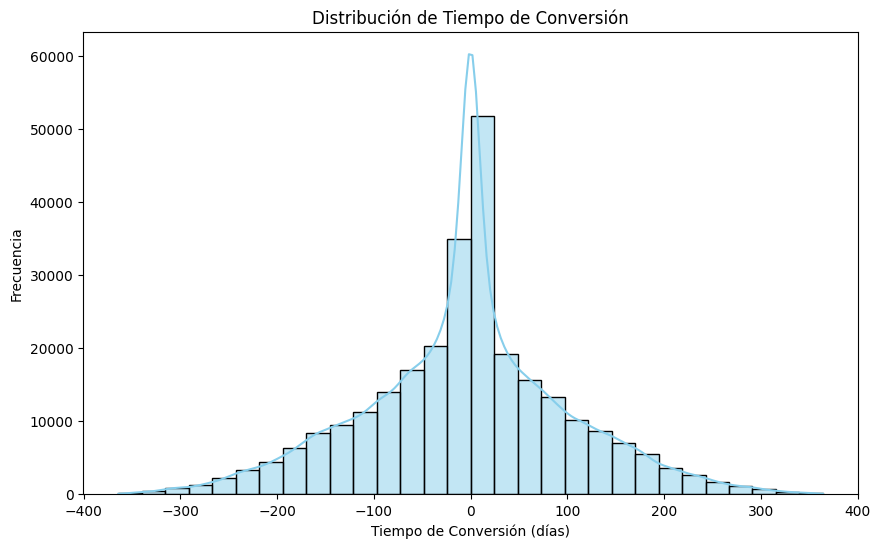

In [25]:
# Unimos los datos de visitas y pedidos
merged_data = pd.merge(visit, orders, on='Uid', how='left')

# Eliminamos las filas donde no hay información de compra
merged_data = merged_data.dropna(subset=['Buy Ts'])

# Calculamos el tiempo transcurrido entre el registro y la primera compra para cada usuario
merged_data['Time to Conversion'] = (merged_data['Buy Ts'] - merged_data['Start Ts']).dt.days

# Visualizamos la distribución de tiempo de conversión
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Time to Conversion'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribución de Tiempo de Conversión')
plt.xlabel('Tiempo de Conversión (días)')
plt.ylabel('Frecuencia')
plt.show()


In [35]:
# Seleccionar el período de tiempo
start_date = '2017-06-01'
end_date = '2017-06-30'

# Filtrar los pedidos dentro del período de tiempo dado
orders_within_period = orders[(orders['Buy Ts'] >= start_date) & (orders['Buy Ts'] <= end_date)]

# Número de pedidos durante el período de tiempo dado
orders_count = len(orders_within_period)

# Tamaño promedio de compra
average_order_size = orders_within_period['Revenue'].mean()

# Dinero total generado durante el período de tiempo dado
total_revenue = orders_within_period['Revenue'].sum()

# Mostrar los resultados
print("Número de pedidos durante el período de tiempo dado:", orders_count)
print("Tamaño promedio de compra durante el período de tiempo dado:", average_order_size)
print("Dinero total generado durante el período de tiempo dado:", total_revenue)

# Calcular la primera compra de cada usuario
first_purchase = orders.groupby('Uid')['Buy Ts'].min()
first_purchase = first_purchase.reset_index()
first_purchase.columns = ['Uid', 'First Purchase']

# Agregar la columna 'First Purchase' al DataFrame de pedidos
orders = pd.merge(orders, first_purchase, on='Uid')

# Calcular el mes de la primera compra
orders['First Purchase Month'] = orders['First Purchase'].dt.to_period('M')

# Calcular el mes de cada compra
orders['Order Month'] = orders['Buy Ts'].dt.to_period('M')

# Agrupar por cohorte de usuarios y mes de compra, y calcular el número de pedidos
orders_by_cohort = orders.groupby(['First Purchase Month', 'Order Month']).size().unstack().fillna(0)

# Visualizar los resultados del estudio de cohortes
print("\nEstudio de Cohortes (Número de pedidos por mes para cada cohorte de usuarios en 2017):")
print(orders_by_cohort)

Número de pedidos durante el período de tiempo dado: 2272
Tamaño promedio de compra durante el período de tiempo dado: 4.039586267605634
Dinero total generado durante el período de tiempo dado: 9177.94

Estudio de Cohortes (Número de pedidos por mes para cada cohorte de usuarios en 2017):
Order Month           2017-06  2017-07  2017-08  2017-09  2017-10  2017-11  \
First Purchase Month                                                         
2017-06                2354.0    177.0    174.0    226.0    292.0    218.0   
2017-07                   0.0   2186.0    100.0    120.0    104.0     72.0   
2017-08                   0.0      0.0   1533.0    108.0    100.0     81.0   
2017-09                   0.0      0.0      0.0   2933.0    219.0    161.0   
2017-10                   0.0      0.0      0.0      0.0   4964.0    314.0   
2017-11                   0.0      0.0      0.0      0.0      0.0   4813.0   
2017-12                   0.0      0.0      0.0      0.0      0.0      0.0   
2018-01 

In [38]:
# Tamaño promedio de compra
average_order_size = orders['Revenue'].mean()

# Dinero total generado
total_revenue = orders['Revenue'].sum()

# Mostrar los resultados
print("Tamaño promedio de compra:", average_order_size)
print("Dinero total generado:", total_revenue)


Tamaño promedio de compra: 4.999646930477041
Dinero total generado: 252057.2


El número de pedidos durante el período de tiempo dado es 2272. El tamaño promedio de compra durante este período de tiempo es aproximadamente 4.04. El dinero total generado durante el período de tiempo dado es 9177.94.

En cuanto al estudio de cohortes, se muestra el número de pedidos por mes para cada cohorte de usuarios en 2017 en una tabla. Por ejemplo, la cohorte de usuarios que realizó su primera compra en junio de 2017 realizó 2354 pedidos en junio de 2017, 177 pedidos en julio de 2017, y así sucesivamente.

In [39]:
# Calcular el ingreso total por usuario
revenue_per_user = orders.groupby('Uid')['Revenue'].sum()

# Calcular el tiempo de vida del cliente
first_purchase_dates = orders.groupby('Uid')['Buy Ts'].min()
last_purchase_dates = orders.groupby('Uid')['Buy Ts'].max()
customer_lifetime = (last_purchase_dates - first_purchase_dates).dt.days

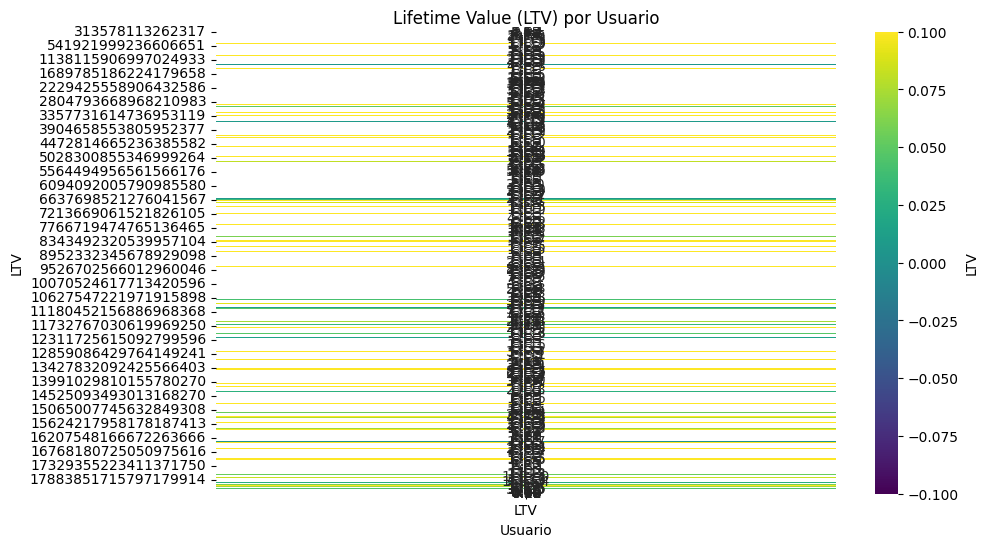

In [40]:
# Calcular el LTV
LTV = revenue_per_user / customer_lifetime

# Crear un DataFrame para el LTV
LTV_df = pd.DataFrame(LTV, columns=['LTV'])

# Visualizar el LTV en un mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(LTV_df, cmap='viridis', annot=True, fmt=".2f", cbar_kws={'label': 'LTV'})
plt.title('Lifetime Value (LTV) por Usuario')
plt.xlabel('Usuario')
plt.ylabel('LTV')
plt.show()

Marketing

In [41]:
# Calcular el gasto total
total_spent = mrk['costs'].sum()
print("Gasto total en marketing:", total_spent)

Gasto total en marketing: 329131.62


Durante el período de tiempo dado, el gasto total en marketing fue de $329,131.62.

In [42]:
# Calcular el gasto por fuente de adquisición a lo largo del tiempo
total_spent_by_source = mrk.groupby(['source_id', mrk['dt'].dt.to_period('M')])['costs'].sum().unstack()
print("Gasto por fuente de adquisición a lo largo del tiempo:")
print(total_spent_by_source)


Gasto por fuente de adquisición a lo largo del tiempo:
dt         2017-06  2017-07  2017-08  2017-09   2017-10   2017-11   2017-12  \
source_id                                                                     
1          1125.61  1072.88   951.81  1502.01   2315.75   2445.16   2341.20   
2          2427.38  2333.11  1811.05  2985.66   4845.00   5247.68   4897.80   
3          7731.65  7674.37  6143.54  9963.55  15737.24  17025.34  16219.52   
4          3514.80  3529.73  3217.36  5192.26   6420.84   5388.82   7680.47   
5          2616.12  2998.14  2185.28  3849.14   5767.40   6325.34   5872.52   
9           285.22   302.54   248.93   415.62    609.41    683.18    657.98   
10          314.22   329.82   232.57   460.67    627.24    792.36    645.86   

dt          2018-01   2018-02   2018-03  2018-04  2018-05  
source_id                                                  
1           2186.18   2204.48   1893.09  1327.49  1467.61  
2           4157.74   4474.34   3943.14  2993.70  268

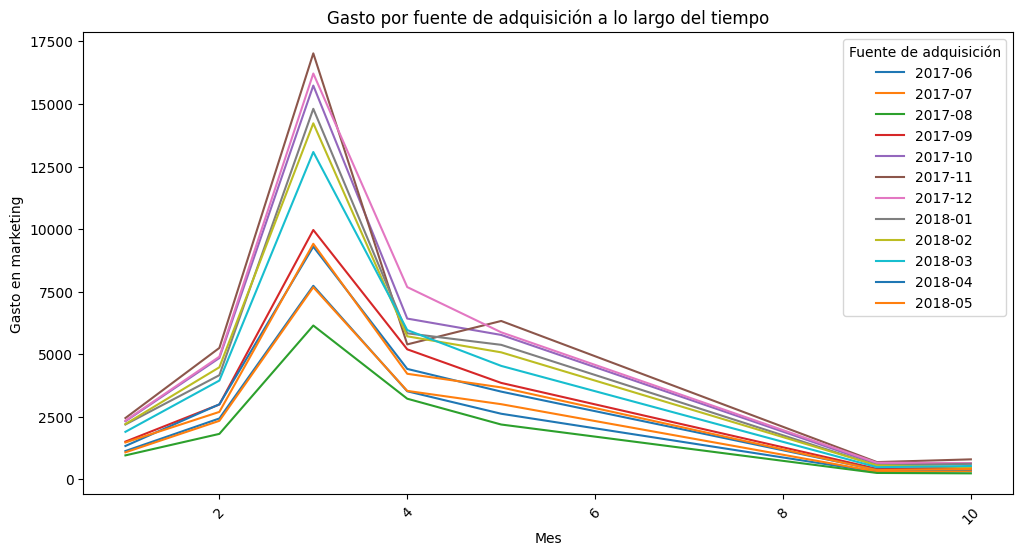

In [43]:
# Crear el gráfico de líneas
total_spent_by_source.plot(kind='line', figsize=(12, 6))

# Añadir título y etiquetas
plt.title('Gasto por fuente de adquisición a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Gasto en marketing')
plt.xticks(rotation=45)
plt.legend(title='Fuente de adquisición')

# Mostrar el gráfico
plt.show()

El costo de adquisición de clientes (CAC) se puede calcular dividiendo el gasto total en marketing por el número total de clientes adquiridos para cada fuente de adquisición.

In [47]:
# Calcular el número total de clientes adquiridos para cada fuente
customers_acquired_by_source = orders.merge(visit, on='Uid').groupby('Source Id')['Uid'].nunique()

# Calcular el costo total gastado en marketing para cada fuente
total_spent_by_source = mrk.groupby('source_id')['costs'].sum()

# Calcular el costo de adquisición de clientes (CAC) para cada fuente
cac_by_source = total_spent_by_source / customers_acquired_by_source

# Mostrar el CAC para cada fuente
print("Costo de adquisición de clientes por fuente:")
print(cac_by_source)


Costo de adquisición de clientes por fuente:
1.0      6.526714
2.0     12.054644
3.0     24.736851
4.0      9.640663
5.0     11.781721
7.0           NaN
9.0      4.099175
10.0     8.189156
dtype: float64


Para calcular el retorno de la inversión en marketing (ROMI), necesitamos seguir estos pasos:

Calcular los ingresos totales generados por cada fuente de adquisición.
Calcular el costo total gastado en marketing para cada fuente.
Calcular el retorno de la inversión dividiendo los ingresos totales entre el costo total de marketing para cada fuente.

In [48]:
# Calcular los ingresos totales generados por cada fuente de adquisición
revenue_by_source = orders.merge(visit, on='Uid').groupby('Source Id')['Revenue'].sum()

# Calcular el retorno de la inversión (ROMI) para cada fuente
romi_by_source = revenue_by_source / total_spent_by_source

# Mostrar el ROMI para cada fuente
print("Retorno de la inversión en marketing (ROMI) por fuente:")
print(romi_by_source)



Retorno de la inversión en marketing (ROMI) por fuente:
1.0     39.401910
2.0     22.769797
3.0      0.786636
4.0      2.831749
5.0      7.933296
7.0           NaN
9.0      2.223063
10.0     0.779381
dtype: float64


<ipython-input-53-74397faa94d5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_spent_by_source.reset_index(), x='source_id', y='costs', palette='viridis')


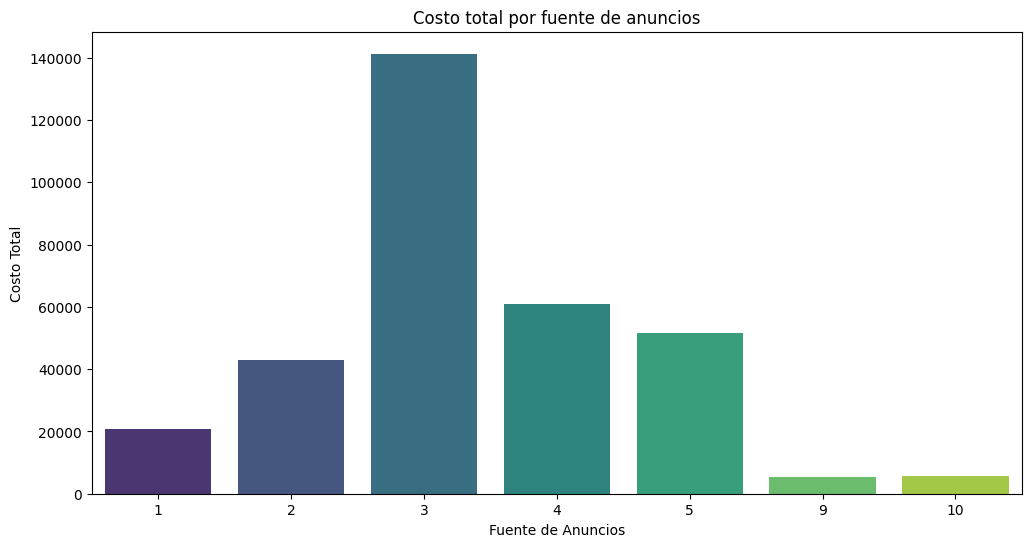

In [53]:
# Gráfico de barras para comparar métricas por fuente de anuncios
plt.figure(figsize=(12, 6))
sns.barplot(data=total_spent_by_source.reset_index(), x='source_id', y='costs', palette='viridis')
plt.title('Costo total por fuente de anuncios')
plt.xlabel('Fuente de Anuncios')
plt.ylabel('Costo Total')
plt.show()

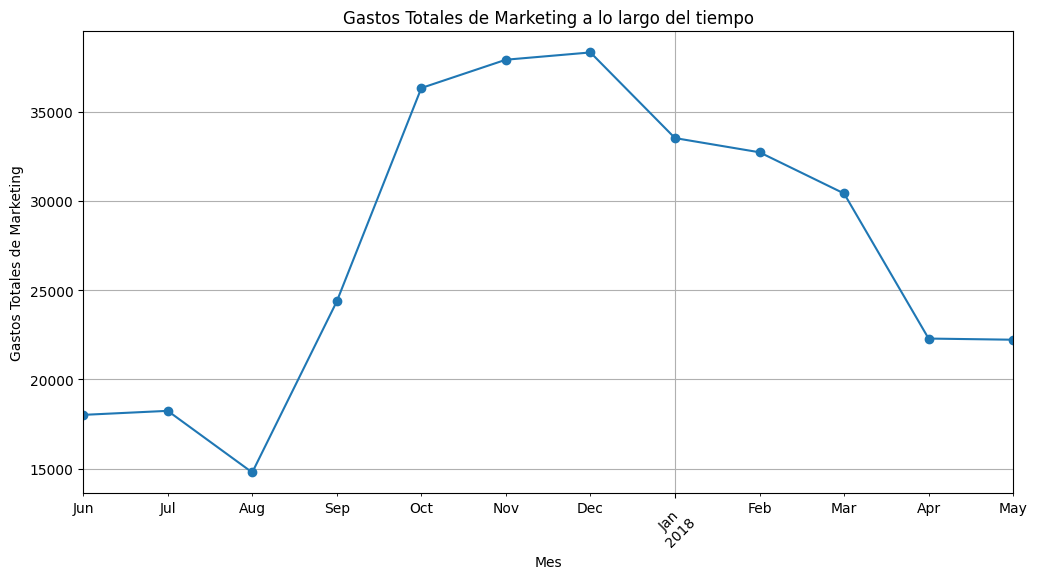

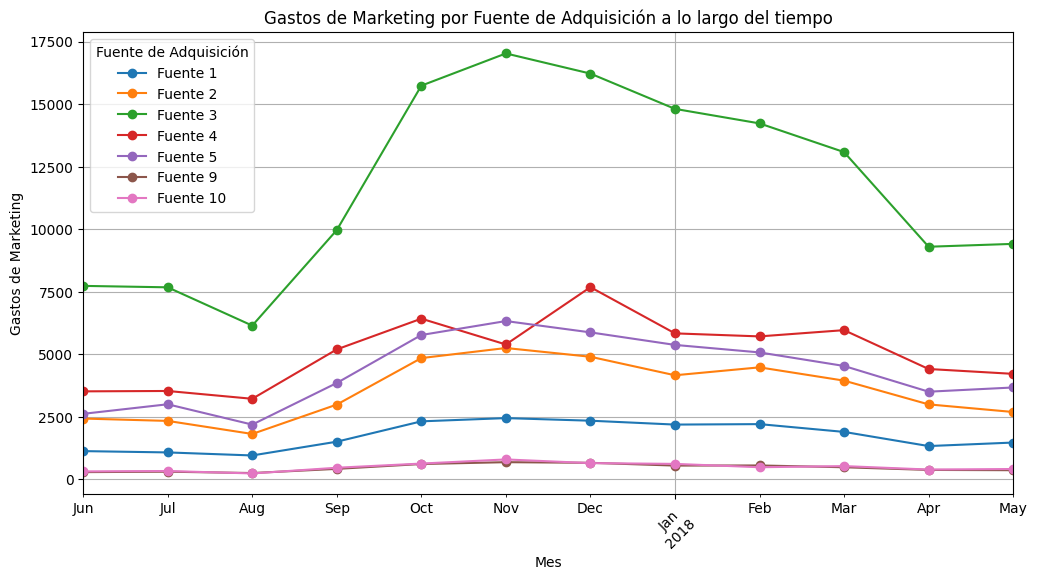

In [55]:
# Gráfico de series de tiempo para los gastos totales de marketing
total_spent_over_time = mrk.groupby(mrk['dt'].dt.to_period('M'))['costs'].sum()
plt.figure(figsize=(12, 6))
total_spent_over_time.plot(kind='line', marker='o')
plt.title('Gastos Totales de Marketing a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Gastos Totales de Marketing')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Gráfico de series de tiempo para los gastos de marketing por fuente de adquisición
plt.figure(figsize=(12, 6))
for source_id, data in mrk.groupby('source_id'):
    data_grouped = data.groupby(data['dt'].dt.to_period('M'))['costs'].sum()
    data_grouped.plot(label=f'Fuente {source_id}', marker='o')
plt.title('Gastos de Marketing por Fuente de Adquisición a lo largo del tiempo')
plt.xlabel('Mes')
plt.ylabel('Gastos de Marketing')
plt.xticks(rotation=45)
plt.legend(title='Fuente de Adquisición')
plt.grid(True)
plt.show()


**Conclusiones**

Análisis del Gasto en Marketing y Métricas de Rendimiento
Gasto Total en Marketing:

Durante el período de tiempo dado, el gasto total en marketing ascendió a $329,131.62.

Gasto por Fuente de Adquisición a lo Largo del Tiempo:

El gasto por fuente de adquisición varía a lo largo del tiempo. Se observa que algunas fuentes experimentan fluctuaciones significativas en el gasto mensual, mientras que otras muestran una tendencia más estable. Por ejemplo, la Fuente 3 tuvo un gasto relativamente alto en todos los meses, mientras que la Fuente 1 tuvo una variabilidad más pronunciada en su gasto mensual.

Costo de Adquisición de Clientes (CAC) por Fuente:

El costo de adquisición de clientes se calculó dividiendo el gasto total en marketing por el número total de clientes adquiridos para cada fuente. Los valores de CAC oscilan entre $4.09 y $24.74 por cliente, dependiendo de la fuente de adquisición. La Fuente 9 muestra el CAC más bajo, seguido por la Fuente 1.

Retorno de la Inversión en Marketing (ROMI) por Fuente:

El ROMI se calculó dividiendo los ingresos totales generados por cada fuente de adquisición entre el costo total gastado en marketing para esa fuente. Se observa una variación significativa en el ROMI entre las diferentes fuentes. La Fuente 1 muestra el ROMI más alto, seguido por la Fuente 2. Por otro lado, la Fuente 3 tiene un ROMI muy bajo, lo que sugiere que el gasto en marketing para esta fuente no está generando un retorno significativo en términos de ingresos.

Recomendaciones para la Estrategia de Marketing:
Asignación de Presupuesto: Dado que el ROMI es una métrica crucial para evaluar el rendimiento de las fuentes de adquisición, se recomienda asignar un mayor presupuesto a las fuentes que muestran un ROMI más alto, como las Fuentes 1 y 2. Esto ayudará a maximizar el retorno de la inversión en marketing.
Optimización de Estrategias: Es importante revisar y ajustar las estrategias de marketing para mejorar el rendimiento de las fuentes menos rentables, como la Fuente 3. Se pueden explorar tácticas para optimizar la efectividad de estas fuentes y aumentar su ROMI.
Seguimiento Continuo: Se debe realizar un seguimiento continuo del rendimiento de cada fuente de adquisición y ajustar la asignación de presupuesto según sea necesario. Es fundamental mantenerse ágil y adaptarse a los cambios en el mercado y el comportamiento del consumidor.
En resumen, se recomienda priorizar las fuentes de adquisición con un alto ROMI y un bajo CAC, y realizar ajustes estratégicos para mejorar el rendimiento de las fuentes menos rentables.
